In [1]:
import pandas as pd

In [2]:
insurance = pd.read_csv("insurance.csv")

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.shape

(1338, 7)

In [5]:
print("The row count of dataset is", insurance.shape[0])

The row count of dataset is 1338


In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Findings: There is no NA value in dataset

In [8]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
insurance.duplicated().sum()

1

Findings: There is one duplicate row in dataset

In [10]:
insurance.drop_duplicates(inplace=True)

In [11]:
#Recheck if there is duplicate row
insurance.duplicated().sum()

0

## 1. Data Analytic

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
insurance.value_counts("sex")

sex
male      675
female    662
dtype: int64

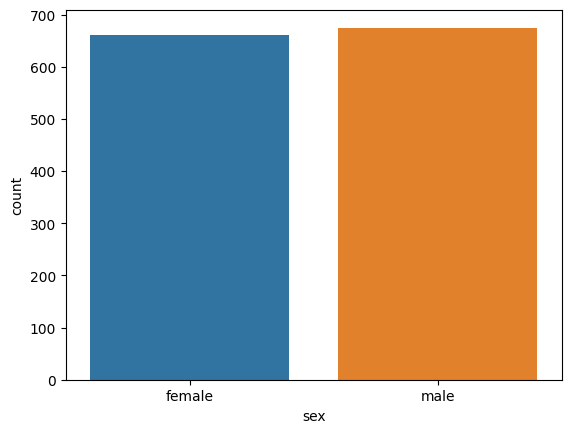

In [14]:
sns.countplot(x="sex", data=insurance)
plt.show()

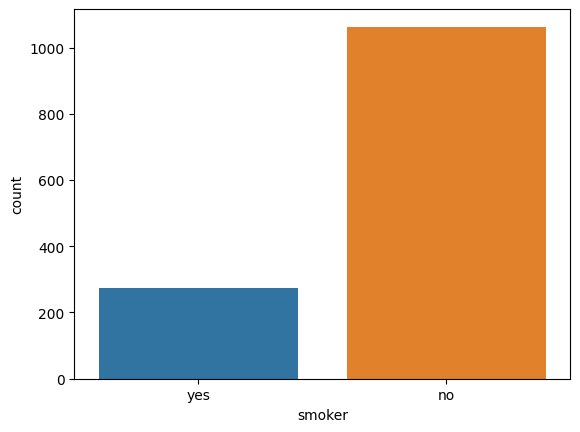

In [15]:
sns.countplot(x="smoker", data=insurance)
plt.show()

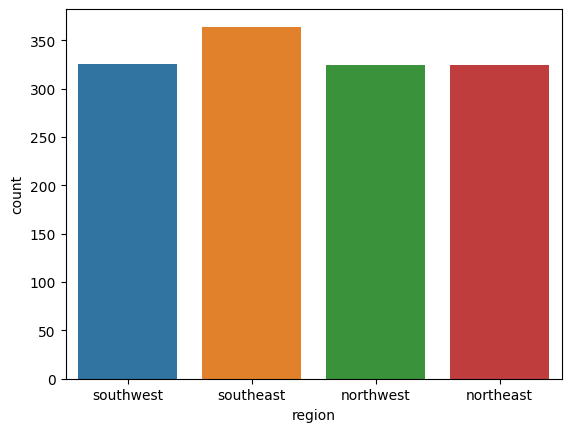

In [16]:
sns.countplot(x="region", data=insurance)
plt.show()

#### Change Categorical Columns into Numerical Columns

In [17]:
from sklearn import preprocessing

In [18]:
labelencoder = preprocessing.LabelEncoder()

In [19]:
insurance['sex'] = labelencoder.fit_transform(insurance['sex'])
insurance['smoker'] = labelencoder.fit_transform(insurance['smoker'])
insurance['region'] = labelencoder.fit_transform(insurance['region'])

In [20]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [21]:
insurance.corr()['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

<AxesSubplot:>

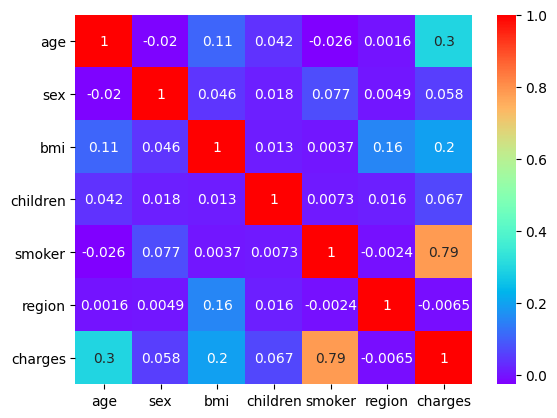

In [22]:
sns.heatmap(insurance.corr(), annot=True, cmap="rainbow")

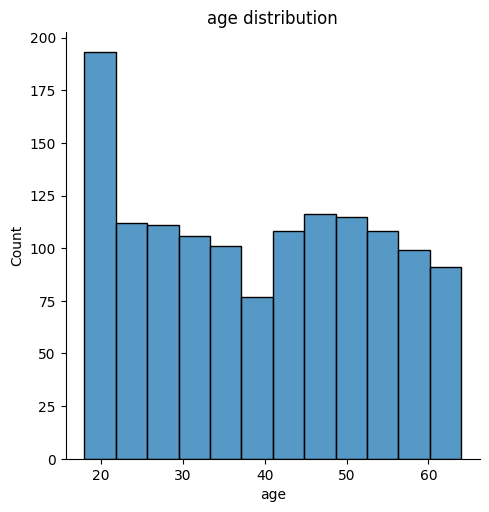

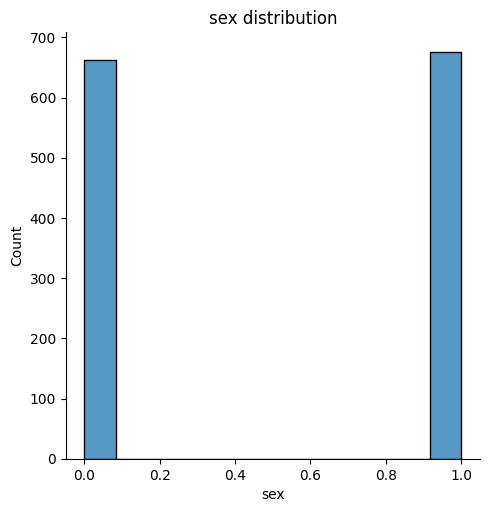

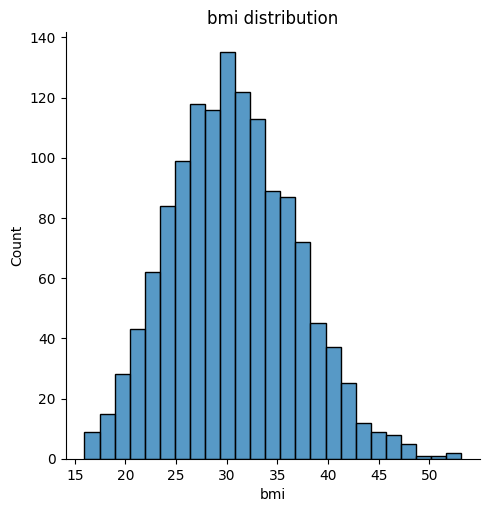

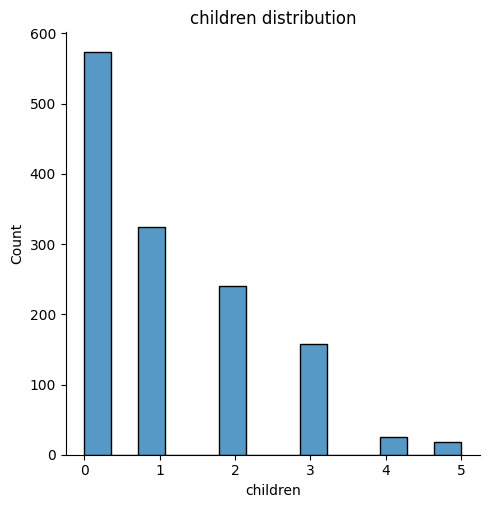

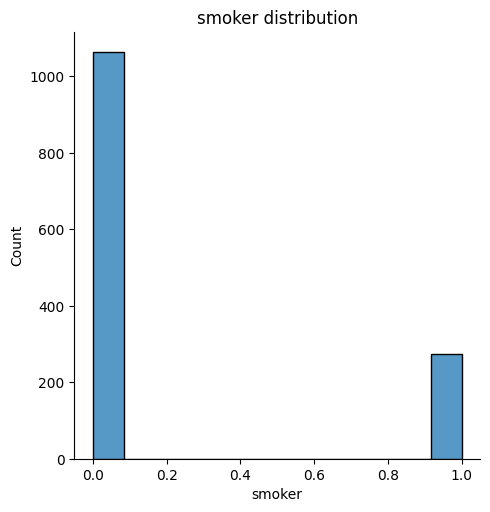

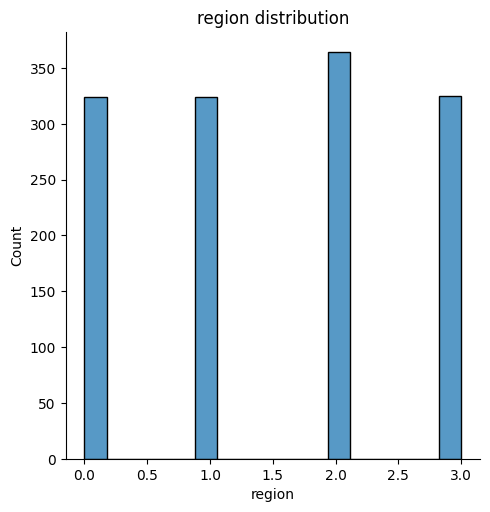

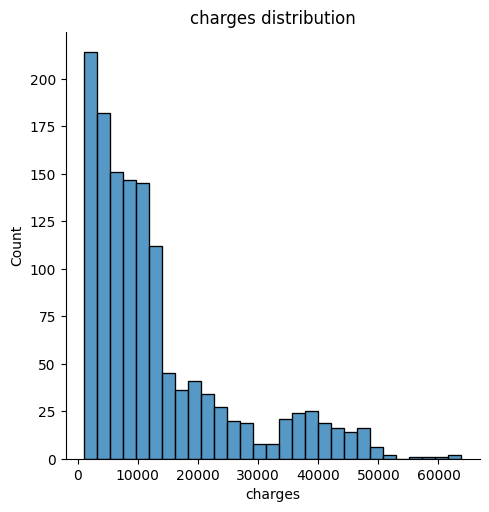

In [23]:
for i in insurance.columns:
    sns.displot(insurance[i])
    plt.title(i + " " + "distribution")
    plt.show()

Findings: BMI having normal distribution

In [24]:
colorsforx = ["Red", "Blue", "Yellow", "Black", "Grey", "Green"]
colorcharger = 0

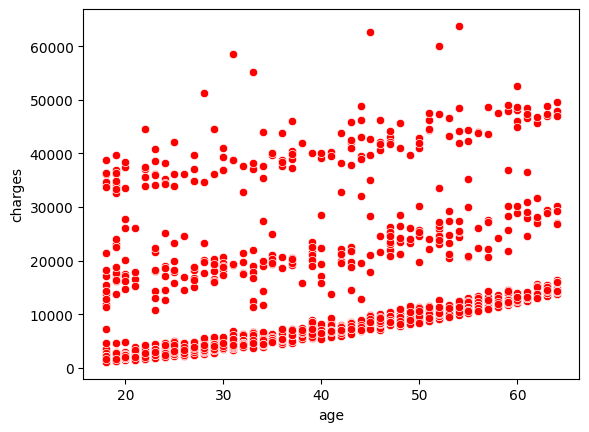

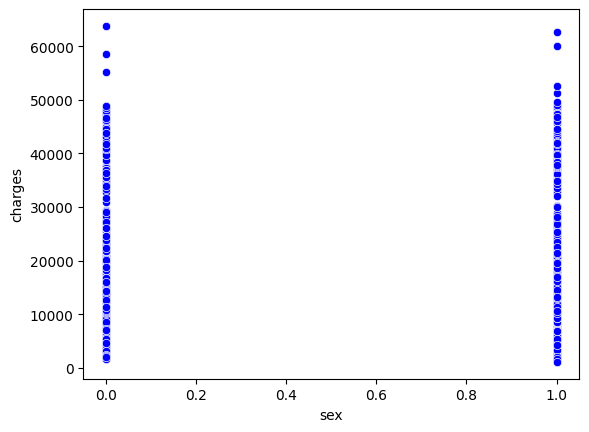

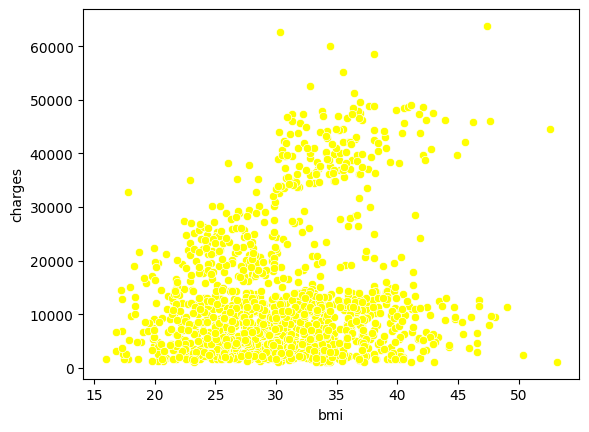

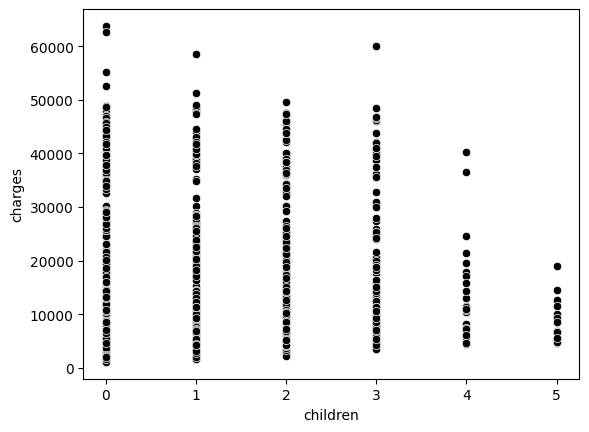

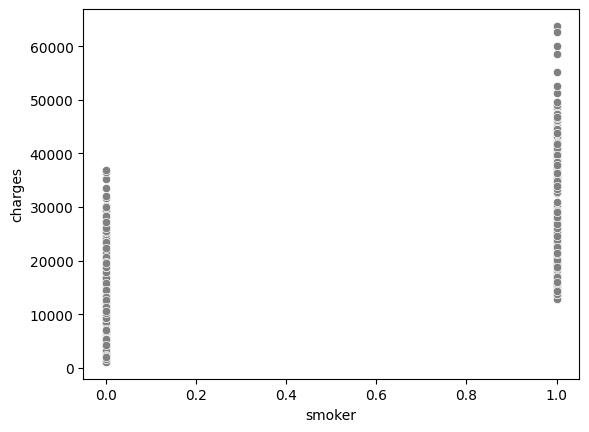

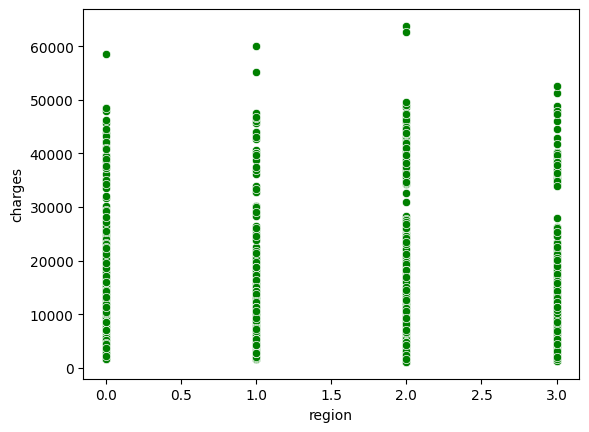

In [25]:
for i in insurance.columns[:-1]:
    sns.scatterplot(data=insurance, x=i, y="charges", color=colorsforx[colorcharger])
    plt.show()
    colorcharger += 1

### Machine Learning

In [26]:
import numpy as np
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [27]:
insurance['sex'] = labelencoder.fit_transform(insurance['sex'])
insurance['smoker'] = labelencoder.fit_transform(insurance['smoker'])
insurance['region'] = labelencoder.fit_transform(insurance['region'])



In [28]:
X = insurance[["age", "sex", "bmi", "children", "smoker", "region"]]
y = insurance["charges"] 

In [29]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
def model_results(predictions):
    print("Mean absolute error on model is {}".format(mean_absolute_error(y_test, predictions)))
    print("Root square error on model is {}".format(np.sqrt(mean_squared_error(y_test, predictions))))
          
          

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(scaled_X_train, y_train)


LinearRegression()

In [35]:
predslr = lr.predict(scaled_X_test)
model_results(predslr)

Mean absolute error on model is 4088.816380025154
Root square error on model is 5862.690645696236


In [36]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svrmodel = SVR()
param_gridsvr = {'C': [0.001, 0.01, 0.1, 0.5, 1], 'kernel': ['linear', 'rbf', 'poly'], 'gamma':['scale', 'auto'], 'degree': [2,3,4,5]}
gridsvr = GridSearchCV(svrmodel, param_gridsvr)
gridsvr.fit(scaled_X_train, y_train)
print("Best parameters for model is {}".format(gridsvr.best_params_))

Best parameters for model is {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [37]:
predsgrider = gridsvr.predict(scaled_X_test)
model_results(predsgrider)


Mean absolute error on model is 7262.220688707858
Root square error on model is 11164.722532702652


In [38]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor()
param_gridfr = {'bootstrap': [True], 'max_depth': [5, 10, 15], 'max_features': ['auto', 'log2'], 'n_estimators': [2,3,4,5,6,7,8,9,10]}
gridfr = GridSearchCV(rfrmodel, param_gridfr)
gridfr.fit(scaled_X_train, y_train)


/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramete

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramete

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramete

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this paramete

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [39]:
predsgridfr = gridfr.predict(scaled_X_test)
model_results(predsgridfr)

Mean absolute error on model is 2528.790315605175
Root square error on model is 4406.954045570504


In [40]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [41]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [42]:
columniterate = 1
for index in X.columns:
    mean = insurance[index].mean()
    print("The mean of the column {} is {}".format(columniterate, mean))
    columniterate+=1
    

The mean of the column 1 is 39.222139117427076
The mean of the column 2 is 0.5048616305160808
The mean of the column 3 is 30.66345175766642
The mean of the column 4 is 1.0957367240089753
The mean of the column 5 is 0.2049364248317128
The mean of the column 6 is 1.5160807778608825


In [43]:
newcustomer = np.array([39, 0, 30, 1, 0, 1])
gridfr.predict(newcustomer.reshape(1, -1))

array([17922.49342314])

In [45]:
print("The insurance cost of new customer is {}".format(gridfr.predict(newcustomer.reshape(1, -1))[0]))

The insurance cost of new customer is 17922.493423137832


## Classification

In [46]:
course = pd.read_csv("CourseData.csv")

In [47]:
course.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [51]:
course.shape
print("Row count of our data is {}".format(course.shape[0]))


Row count of our data is 36275


In [52]:
course.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [55]:
course.iloc[course["no_of_previous_cancellations"].idxmax()]

Booking_ID                                 INN12098
no_of_adults                                      2
no_of_children                                    0
no_of_weekend_nights                              1
no_of_week_nights                                 1
type_of_meal_plan                       Meal Plan 1
required_car_parking_space                        0
room_type_reserved                      Room_Type 1
lead_time                                       190
arrival_year                                   2018
arrival_month                                     4
arrival_date                                      9
market_segment_type                         Offline
repeated_guest                                    1
no_of_previous_cancellations                     13
no_of_previous_bookings_not_canceled              1
avg_price_per_room                             70.0
no_of_special_requests                            0
booking_status                             Canceled
Name: 12097,

In [56]:
course.iloc[course["no_of_previous_cancellations"].idxmin()]

Booking_ID                                  INN00001
no_of_adults                                       2
no_of_children                                     0
no_of_weekend_nights                               1
no_of_week_nights                                  2
type_of_meal_plan                        Meal Plan 1
required_car_parking_space                         0
room_type_reserved                       Room_Type 1
lead_time                                        224
arrival_year                                    2017
arrival_month                                     10
arrival_date                                       2
market_segment_type                          Offline
repeated_guest                                     0
no_of_previous_cancellations                       0
no_of_previous_bookings_not_canceled               0
avg_price_per_room                              65.0
no_of_special_requests                             0
booking_status                          Not_Ca

In [57]:
course.iloc[course['avg_price_per_room'].idxmax()]

Booking_ID                                 INN33115
no_of_adults                                      2
no_of_children                                    0
no_of_weekend_nights                              0
no_of_week_nights                                 1
type_of_meal_plan                       Meal Plan 1
required_car_parking_space                        0
room_type_reserved                      Room_Type 1
lead_time                                        35
arrival_year                                   2018
arrival_month                                     3
arrival_date                                     25
market_segment_type                         Offline
repeated_guest                                    0
no_of_previous_cancellations                      0
no_of_previous_bookings_not_canceled              0
avg_price_per_room                            540.0
no_of_special_requests                            0
booking_status                             Canceled
Name: 33114,

In [58]:
course.iloc[course['avg_price_per_room'].idxmin()]

Booking_ID                                   INN00064
no_of_adults                                        1
no_of_children                                      0
no_of_weekend_nights                                0
no_of_week_nights                                   1
type_of_meal_plan                         Meal Plan 1
required_car_parking_space                          0
room_type_reserved                        Room_Type 1
lead_time                                           2
arrival_year                                     2017
arrival_month                                       9
arrival_date                                       10
market_segment_type                     Complementary
repeated_guest                                      0
no_of_previous_cancellations                        0
no_of_previous_bookings_not_canceled                0
avg_price_per_room                                0.0
no_of_special_requests                              1
booking_status              

In [59]:
course.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [60]:
course.duplicated().sum()

0

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
course["no_of_children"].value_counts().sort_values(ascending=False)

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_children', ylabel='count'>

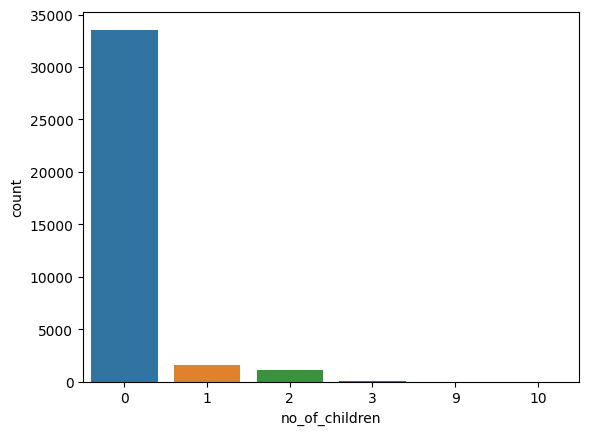

In [66]:
sns.countplot("no_of_children", data=course)

In [69]:
course["type_of_meal_plan"].value_counts().sort_values(ascending=False)

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [70]:
mealtypelabels = course["type_of_meal_plan"].unique()

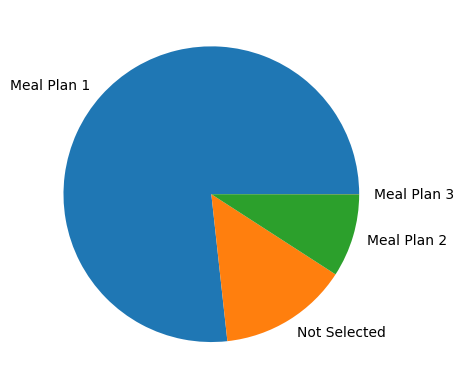

In [74]:
plt.pie(course["type_of_meal_plan"].value_counts(), labels=mealtypelabels)
plt.show()


In [75]:
course["room_type_reserved"].value_counts().sort_values(ascending=False)

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='room_type_reserved', ylabel='count'>

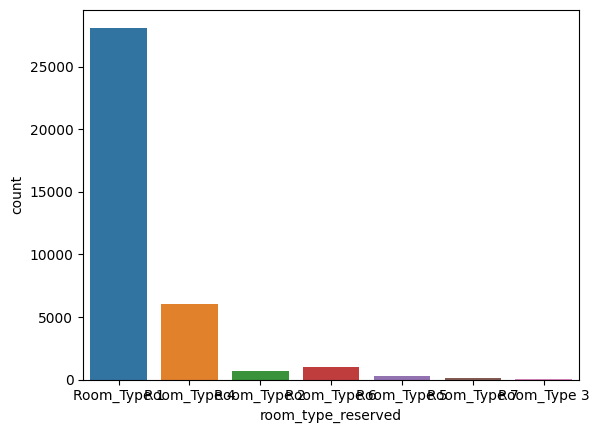

In [76]:
sns.countplot(course["room_type_reserved"], data=course)

In [77]:
course["required_car_parking_space"].value_counts().sort_values(ascending=False)

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

<AxesSubplot:xlabel='required_car_parking_space', ylabel='count'>

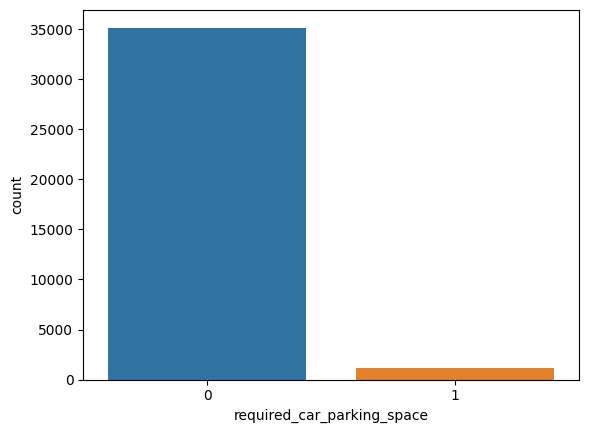

In [78]:
sns.countplot(x="required_car_parking_space", data=course)

In [79]:
course["booking_status"].value_counts().sort_values(ascending=False)

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

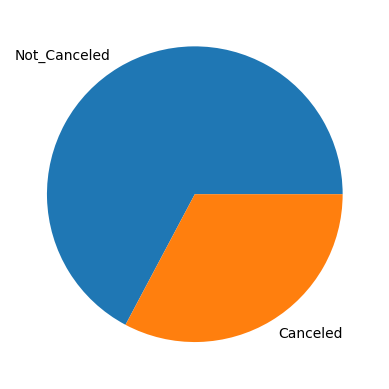

In [82]:
bookinglabels = course["booking_status"].unique()
plt.pie(course["booking_status"].value_counts(), labels=bookinglabels)
plt.show()

In [84]:
course = course[["no_of_adults", "no_of_children", "no_of_weekend_nights", 
                "no_of_week_nights", "type_of_meal_plan", "room_type_reserved",
                "no_of_previous_cancellations", "avg_price_per_room", "booking_status"]]

In [85]:
course.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,no_of_previous_cancellations,avg_price_per_room,booking_status
0,2,0,1,2,Meal Plan 1,Room_Type 1,0,65.00,Not_Canceled
1,2,0,2,3,Not Selected,Room_Type 1,0,106.68,Not_Canceled
2,1,0,2,1,Meal Plan 1,Room_Type 1,0,60.00,Canceled
3,2,0,0,2,Meal Plan 1,Room_Type 1,0,100.00,Canceled
4,2,0,1,1,Not Selected,Room_Type 1,0,94.50,Canceled


In [86]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [87]:
course["type_of_meal_plan"] = labelencoder.fit_transform(course["type_of_meal_plan"])

/var/folders/gq/nf98s58d705cw4p162k5rth80000gn/T/ipykernel_42396/1037840791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course["type_of_meal_plan"] = labelencoder.fit_transform(course["type_of_meal_plan"])


In [88]:
course["type_of_meal_plan"].head()

0    0
1    3
2    0
3    0
4    3
Name: type_of_meal_plan, dtype: int64

In [89]:
course["room_type_reserved"] = labelencoder.fit_transform(course["room_type_reserved"])
course["booking_status"] = labelencoder.fit_transform(course["booking_status"])


/var/folders/gq/nf98s58d705cw4p162k5rth80000gn/T/ipykernel_42396/3367724882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course["room_type_reserved"] = labelencoder.fit_transform(course["room_type_reserved"])
/var/folders/gq/nf98s58d705cw4p162k5rth80000gn/T/ipykernel_42396/3367724882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  course["booking_status"] = labelencoder.fit_transform(course["booking_status"])


In [90]:
course.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,no_of_previous_cancellations,avg_price_per_room,booking_status
0,2,0,1,2,0,0,0,65.00,1
1,2,0,2,3,3,0,0,106.68,1
2,1,0,2,1,0,0,0,60.00,0
3,2,0,0,2,0,0,0,100.00,0
4,2,0,1,1,3,0,0,94.50,0


In [92]:
course.corr()["booking_status"].sort_values(ascending=False)

booking_status                  1.000000
no_of_previous_cancellations    0.033728
room_type_reserved             -0.022986
type_of_meal_plan              -0.026706
no_of_children                 -0.033078
no_of_weekend_nights           -0.061563
no_of_adults                   -0.086920
no_of_week_nights              -0.092996
avg_price_per_room             -0.142569
Name: booking_status, dtype: float64

<AxesSubplot:>

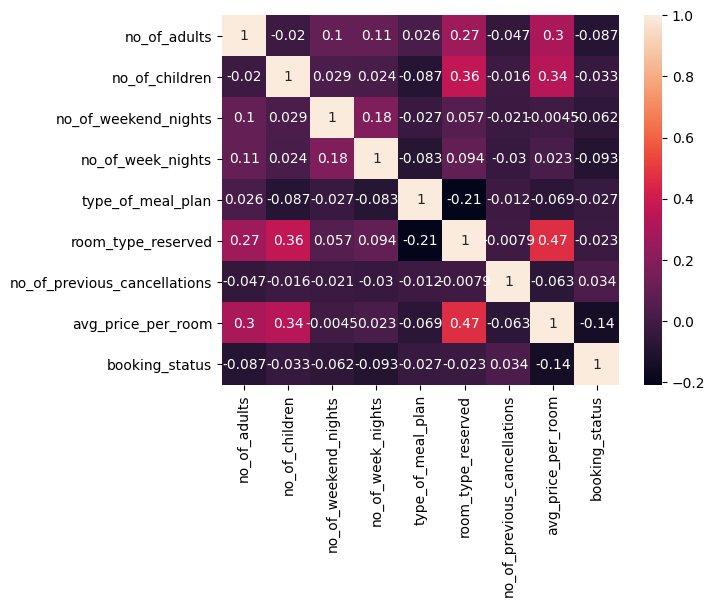

In [94]:
sns.heatmap(data=course.corr(), annot=True)

In [95]:
course.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'room_type_reserved',
       'no_of_previous_cancellations', 'avg_price_per_room', 'booking_status'],
      dtype='object')

In [96]:
X = course[["no_of_adults", "no_of_children", "no_of_weekend_nights", 
                "no_of_week_nights", "type_of_meal_plan", "room_type_reserved",
                "no_of_previous_cancellations", "avg_price_per_room"]]

In [97]:
y = course[["booking_status"]]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [100]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [119]:
from sklearn.metrics import accuracy_score
def model_results(predictions):
    print("Accuracy score of the model is {}".format(accuracy_score(y_test, predictions)))

In [101]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(scaled_X_train, y_train)

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [120]:
log_prediction = log_model.predict(scaled_X_test)
model_results(log_prediction)


Accuracy score of the model is 0.6638794450059726


In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
knn = KNeighborsClassifier()
k_values = list(range(1,30))
pipe = Pipeline(steps = [("knn", knn)])
param_grid = {"knn__n_neighbors": k_values}
cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring="accuracy")
cv_classifier.fit(scaled_X_train, y_train)
print(cv_classifier.best_params_)

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed 

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed 

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed 

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed 

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed 

{'knn__n_neighbors': 11}


/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [115]:
pred_gridknn = cv_classifier.predict(scaled_X_test)
model_results(pred_gridknn)

Mean absolute error on model is 0.29302582008637323
Root square error on model is 0.5413185938856833


In [117]:
from sklearn.ensemble import RandomForestClassifier
rfr_model = RandomForestClassifier()
n_estimators = [32, 64, 128]
max_features = [2,3]
bootstrap = [True, False]
oob_score = [True, False]
param_grid_rfr = {"n_estimators": n_estimators, "max_features": max_features, "bootstrap": bootstrap, "oob_score": oob_score}
grid_rfr = GridSearchCV(rfr_model, param_grid_rfr)
grid_rfr.fit(scaled_X_train, y_train.values.ravel())
print(grid_rfr.best_params_)



/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 437, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.wa

{'bootstrap': True, 'max_features': 3, 'n_estimators': 128, 'oob_score': True}


In [121]:
predsrfc = grid_rfr.predict(scaled_X_test)
model_results(predsrfc)

Accuracy score of the model is 0.6738950656987963


In [122]:
print(X.describe())

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       type_of_meal_plan  room_type_reserved  no_of_previous_cancellations  \
count       36275.000000        36275.000000                  36275.000000   
mean            0.515644            0.708890                      0.023349   
std             1.048131            1.399851 

In [123]:
#Make Prediction
customerdata = np.array([2,1,1,2,1,1,0,110])

In [124]:
def cancelornot(customer):
    prediction = cv_classifier.predict(customer.reshape(1,-1))
    if prediction == 1:
        return "Wont cancel the booking"
    else:
        return "Will cancel the booking"

In [125]:
cancelornot(customerdata)

'Will cancel the booking'

## Income Analysis

In [167]:
video = pd.read_csv("Videodata.csv")

In [168]:
video.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [169]:
video.shape

(32561, 15)

In [170]:
video.iloc[video['age'].idxmax()]

age                            90
 workclass                Private
 fnlwgt                     51744
 education                HS-grad
 education-num                  9
 marital-status     Never-married
 occupation         Other-service
 relationship       Not-in-family
 race                       Black
 sex                         Male
 capital-gain                   0
 capital-loss                2206
 hours-per-week                40
 native-country     United-States
 income                     <=50K
Name: 222, dtype: object

In [171]:
video.iloc[video['age'].idxmin()]

age                            17
 workclass                      ?
 fnlwgt                    304873
 education                   10th
 education-num                  6
 marital-status     Never-married
 occupation                     ?
 relationship           Own-child
 race                       White
 sex                       Female
 capital-gain               34095
 capital-loss                   0
 hours-per-week                32
 native-country     United-States
 income                     <=50K
Name: 106, dtype: object

In [172]:
video[" workclass"].value_counts().sort_values(ascending=False)

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64

In [173]:
video[" income"].value_counts().sort_values(ascending=False)

 <=50K    24720
 >50K      7841
Name:  income, dtype: int64

In [174]:
import matplotlib
matplotlib.rc("figure", figsize = (20,10))

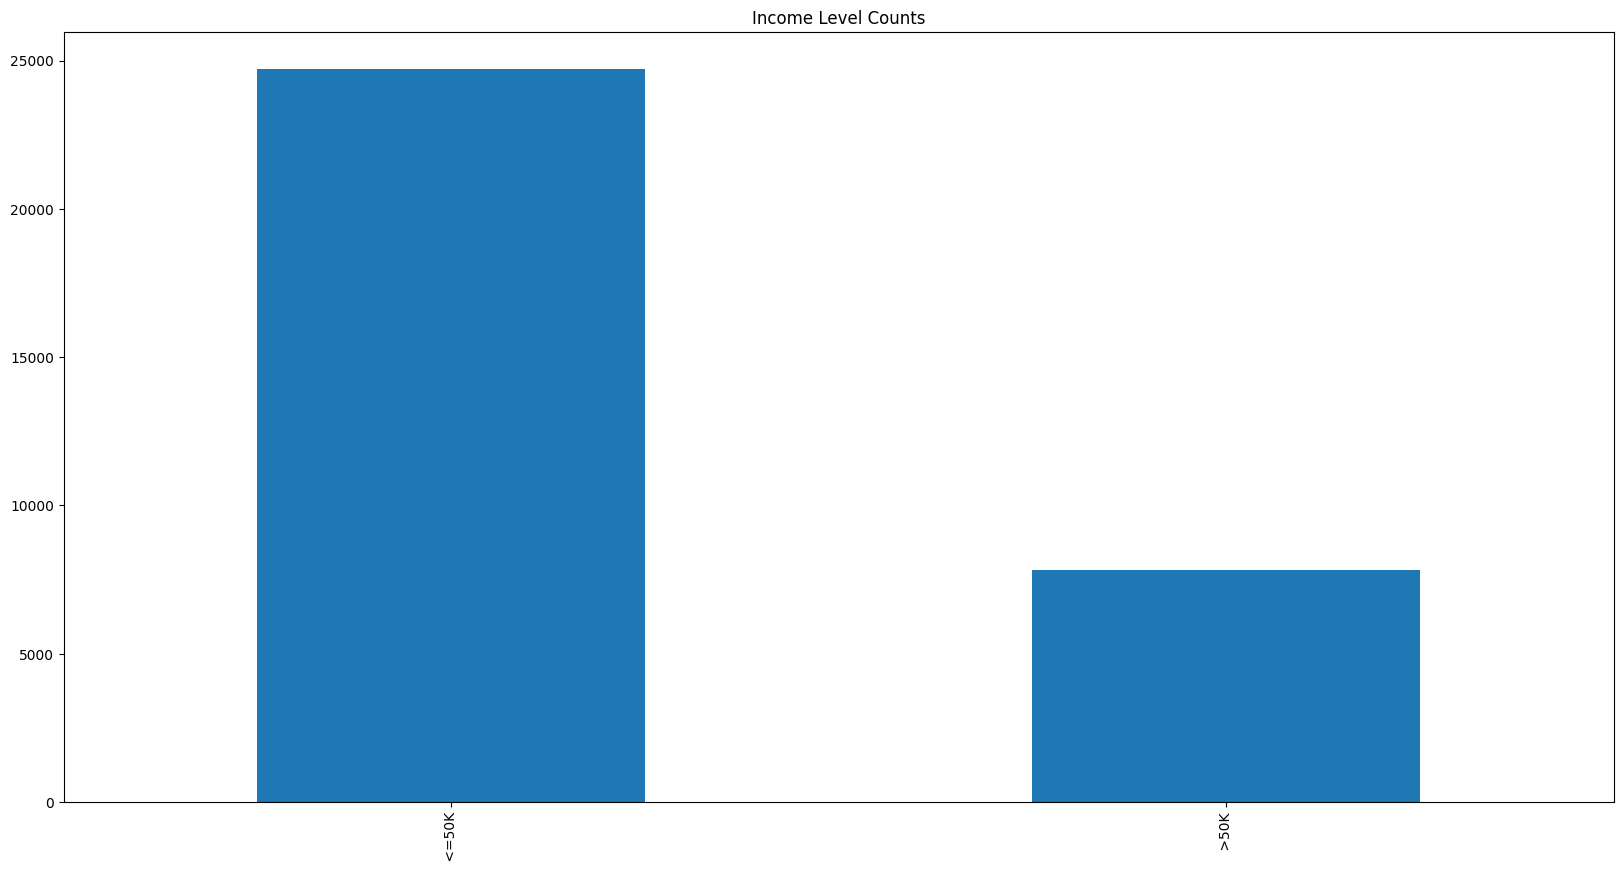

In [175]:
import matplotlib.pyplot as plt
video[" income"].value_counts().plot(kind="bar")
plt.title("Income Level Counts")
plt.show()

In [176]:
video[" education"].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  education, dtype: int64

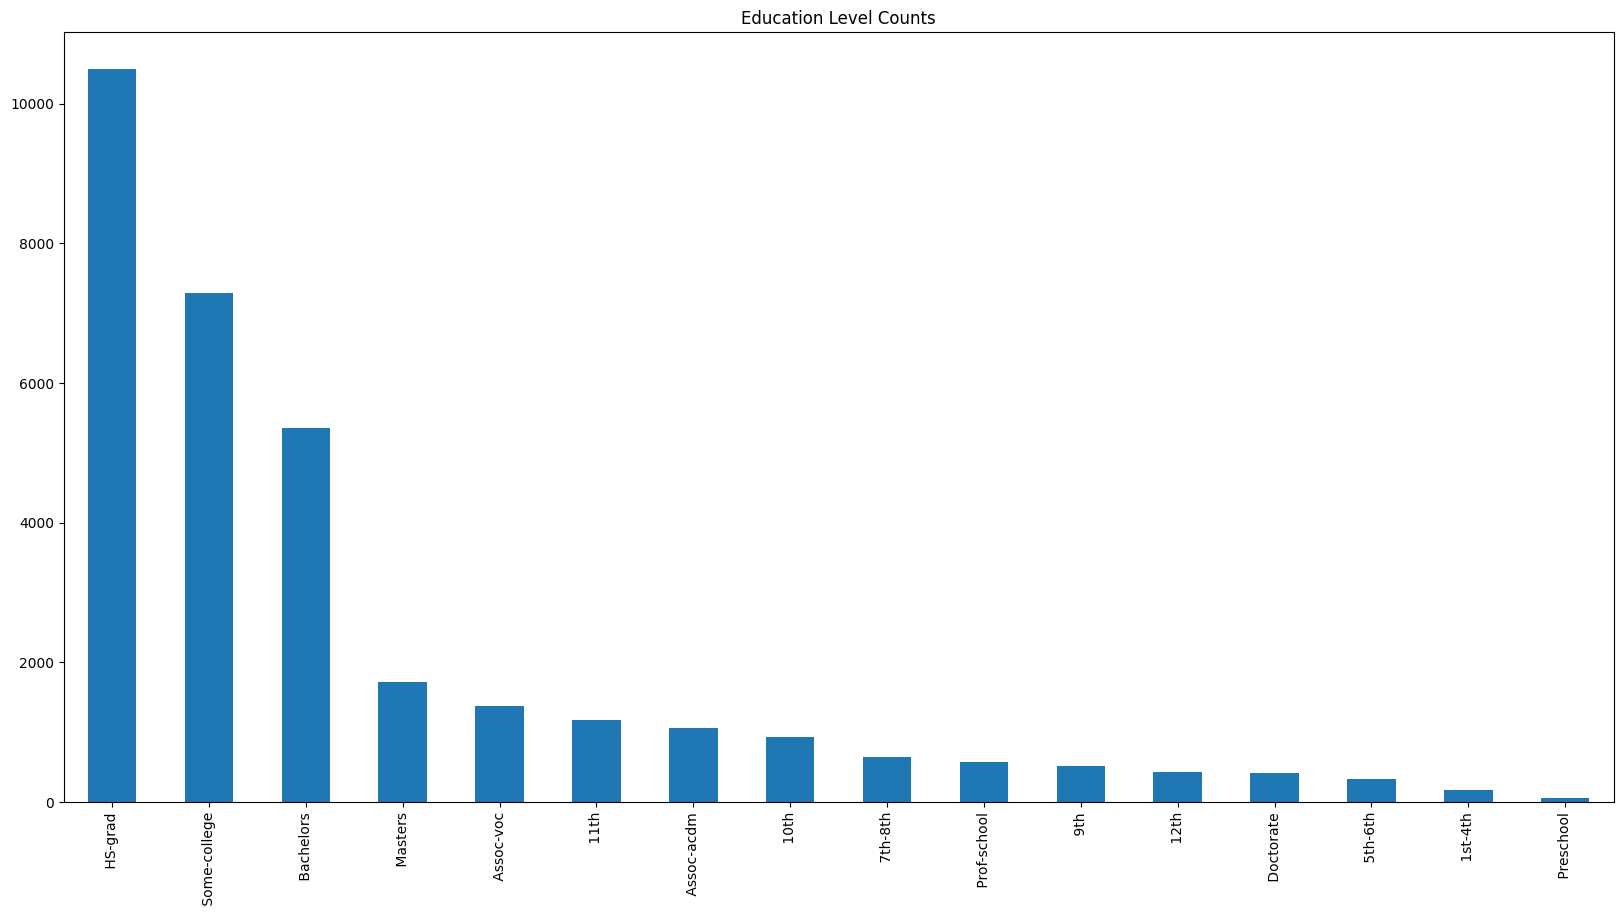

In [177]:
video[" education"].value_counts().plot(kind ="bar")
plt.title("Education Level Counts")
plt.show()

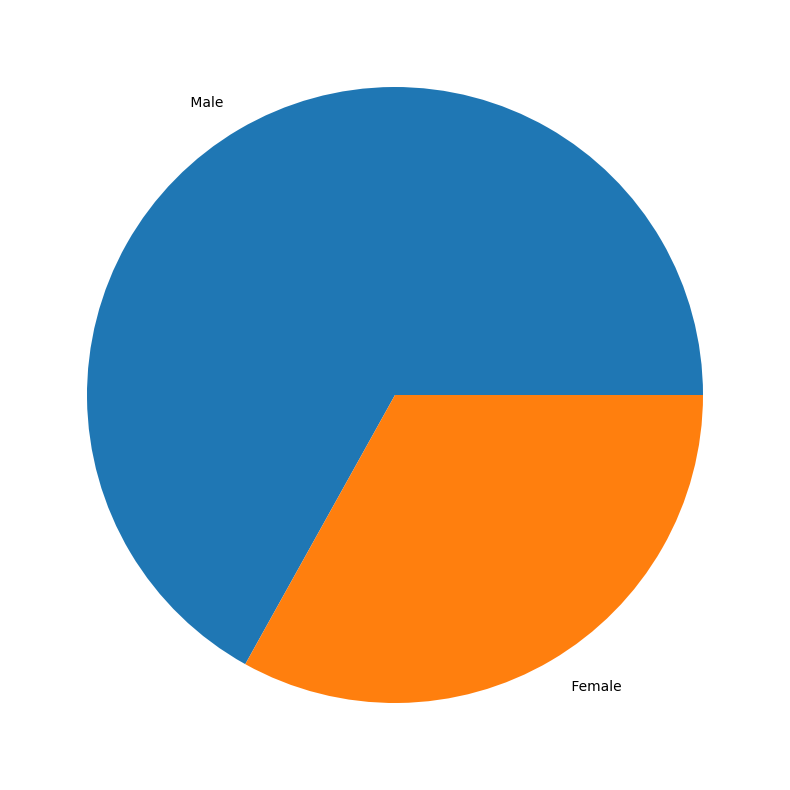

In [178]:
sexlabels = video[" sex"].unique()
plt.pie(video[" sex"].value_counts(), labels=sexlabels)
plt.show()

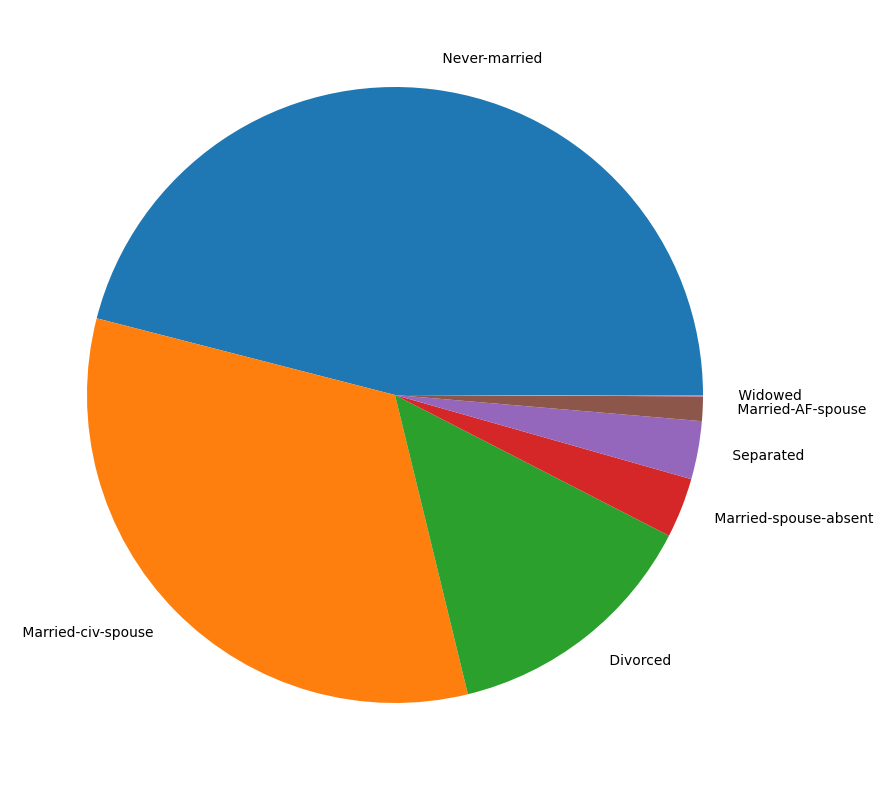

In [179]:
maritalstatuslabels = video[" marital-status"].unique()
plt.pie(video[" marital-status"].value_counts(), labels=maritalstatuslabels)
plt.show()

In [180]:
video.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [181]:
video = video[["age", " workclass", " education", " marital-status", " occupation", 
               " hours-per-week", " native-country", " income"]]
video.columns = [["age", "workclass", "education", "marital-status", "occupation", 
               "hours-per-week", "native-country", "income"]]


In [182]:
video.isna().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [183]:
video.duplicated().sum()

7226

In [184]:
video.drop_duplicates(inplace = True)

In [185]:
video.duplicated().sum()

0

In [186]:
video.head()

,age,workclass,education,marital-status,occupation,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,40,Cuba,<=50K


In [187]:
labelencoder = LabelEncoder()
video["workclass"] = labelencoder.fit_transform(video["workclass"])
video["education"] = labelencoder.fit_transform(video["education"])
video["marital-status"] = labelencoder.fit_transform(video["marital-status"])
video["occupation"] = labelencoder.fit_transform(video["occupation"])
video["hours-per-week"] = labelencoder.fit_transform(video["hours-per-week"])
video["native-country"] = labelencoder.fit_transform(video["native-country"])



/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [188]:
video.head()

,age,workclass,education,marital-status,occupation,hours-per-week,native-country,income
0,39,7,9,4,1,39,39,<=50K
1,50,6,9,2,4,12,39,<=50K
2,38,4,11,0,6,39,39,<=50K
3,53,4,1,2,6,39,39,<=50K
4,28,4,9,2,10,39,5,<=50K


/var/folders/gq/nf98s58d705cw4p162k5rth80000gn/T/ipykernel_42396/2265046962.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=video.corr(), annot=True)


<AxesSubplot:xlabel='None', ylabel='None'>

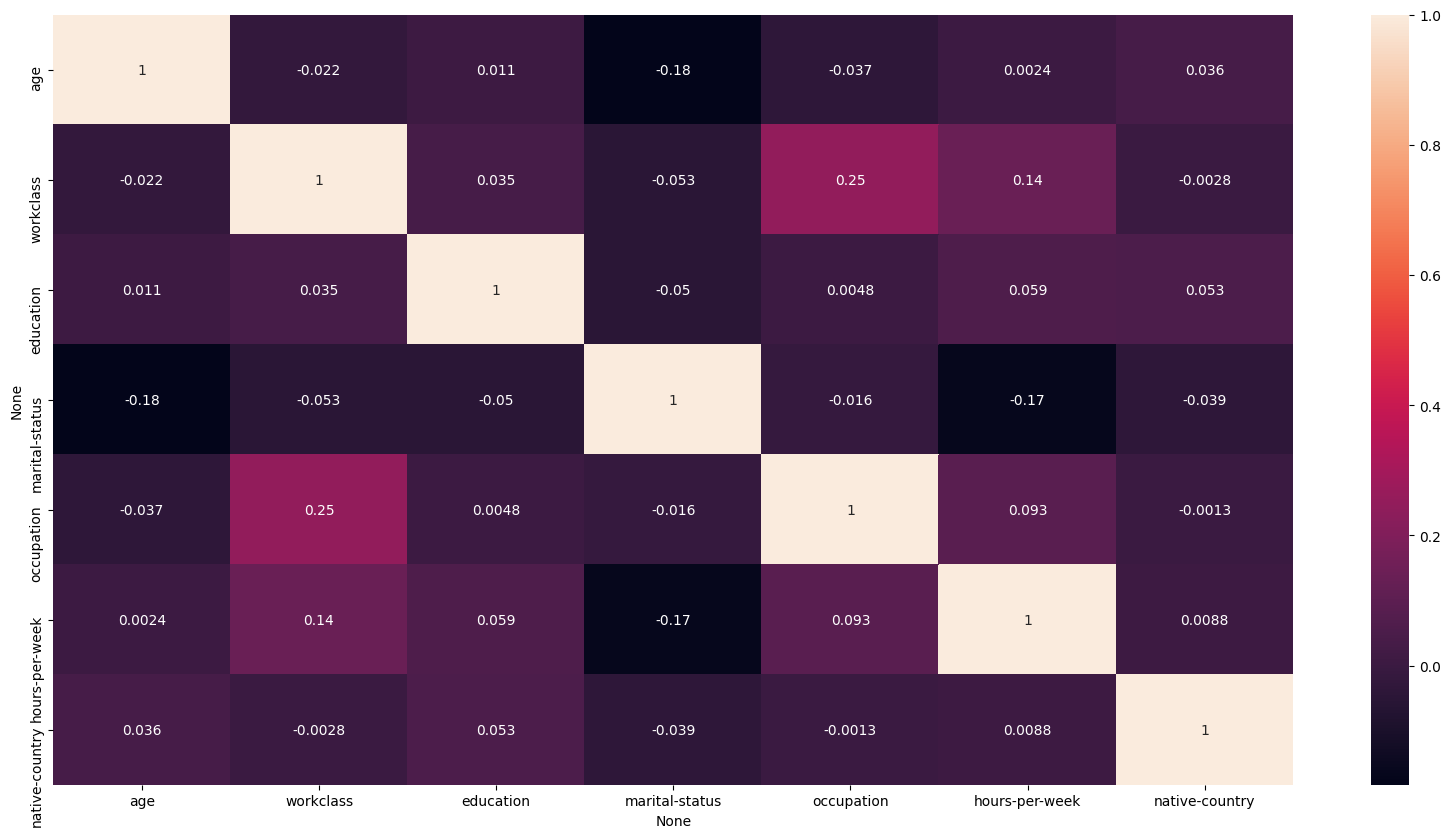

In [189]:
sns.heatmap(data=video.corr(), annot=True)

In [191]:
X = video[["age", "workclass", "education", "marital-status", "occupation", "hours-per-week", "native-country"]]
y = video["income"]


In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [198]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [199]:
def model_results(predictions):
    print("Accuracy score of the model is {}".format(accuracy_score(y_test, predictions)))

In [200]:
log_model = LogisticRegression()
log_model.fit(scaled_X_train, y_train)

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [201]:
log_prediction = log_model.predict(scaled_X_test)
model_results(log_prediction)

Accuracy score of the model is 0.736218918563347


In [202]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
knn = KNeighborsClassifier()
k_values = list(range(1,30))
pipe = Pipeline(steps = [("knn", knn)])
param_grid = {"knn__n_neighbors": k_values}
cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring="accuracy")
cv_classifier.fit(scaled_X_train, y_train)
print(cv_classifier.best_params_)

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed 

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed 

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed 

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed 

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed 

{'knn__n_neighbors': 24}


/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [204]:
pred_gridknn = cv_classifier.predict(scaled_X_test)
model_results(pred_gridknn)

Accuracy score of the model is 0.7973950795947902


In [206]:
from sklearn.svm import SVC
svm = SVC()
param_grid_svr = {'C': [0.1, 0.5, 1], "kernel": ["linear", "rbf", "poly"]}
gridsvr = GridSearchCV(svm, param_grid_svr)
gridsvr.fit(scaled_X_train, y_train)

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when 

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when 

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [207]:
pred_svr = gridsvr.predict(scaled_X_test)
model_results(pred_svr)

Accuracy score of the model is 0.7884488883041705


In [208]:
from sklearn.ensemble import RandomForestClassifier
rfr_model = RandomForestClassifier()
n_estimators = [32, 64, 128]
max_features = [2,3]
bootstrap = [True, False]
oob_score = [True, False]
param_grid_rfr = {"n_estimators": n_estimators, "max_features": max_features, "bootstrap": bootstrap, "oob_score": oob_score}
grid_rfr = GridSearchCV(rfr_model, param_grid_rfr)
grid_rfr.fit(scaled_X_train, y_train.values.ravel())
print(grid_rfr.best_params_)

/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tanengteck/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 437, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.wa

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128, 'oob_score': True}


In [209]:
predsrfc = grid_rfr.predict(scaled_X_test)
model_results(predsrfc)

Accuracy score of the model is 0.7721352453624523


In [213]:
columniterate = 1
for index in X.columns:
    mean = video[index].mean()
    print("The mean of the column {} is {}".format(columniterate, mean))
    columniterate+=1

The mean of the column 1 is 40.22893230708506
The mean of the column 2 is 3.89449378330373
The mean of the column 3 is 10.075350305900928
The mean of the column 4 is 2.5483323465561476
The mean of the column 5 is 6.733096506808763
The mean of the column 6 is 39.85186500888099
The mean of the column 7 is 36.10447996842313


In [221]:
def prediction(newentry):
    pred = cv_classifier.predict(newentry.reshape(1, -1))
    if pred == 0 :
        return "below or equal to 50%"
    else:
        return "more than 50%"

In [224]:
newentry = np.array([40, 3, 10, 2, 6, 40, 36])
print("Income prediction of the new issues is {}".format(prediction(newentry)))

Income prediction of the new issues is more than 50%
